<a href="https://colab.research.google.com/github/Sudar278/Capstone-Project_1-EDA-on-GTA-Data-/blob/main/EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name - EDA on Globa Terrorism Dataset(1970-2017)**

 **Contribution**    - Individual

 **Name**    - Sudar

**Project Summary -**

 **GitHub Link -**https://github.com/Sudar278/Capstone-Project_1-EDA-on-GTA-Data-.git

Importing necessary libraries and reading the data set as df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url='/content/drive/MyDrive/Capstone_project_datas/Global Terrorism Data.csv'
df = pd.read_csv(url,encoding = "ISO-8859-1")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Looking at my data set
df


In [ ]:
'''Extracting number of attacks done on a day from the event id column'''
df['num_attack']=df['eventid'].astype(str).str[-4:]
df['num_attack']=df['num_attack'].astype(int)
list(df.columns)

In [ ]:
'''After reading the data set description I came to know that many columns are not nesscesary for my analysis 
so I decided to create a new data set with necessary coloumns'''


df1=df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1','success','nkill','suicide','nwound','gname','targtype1_txt','weapsubtype1_txt','num_attack']]
df1

In [ ]:
#getting info about the null values
df1.info()

In [6]:
#calculating the number of null values in the redefined data set

In [ ]:
"""
Some basic insights question from the dataset
1.Total number of attack
2.Total number of persons wounded
3.Total number of persons killed
4.Country with highest number of attack and the number of attack
5.City with highest number of attack
6.Region with the most attacks
7.Year with the most attacks
8. Group that made most attacks
9.Attack Type used widely"""

In [ ]:
# Answers for the above mentioned Questions
df_country=pd.DataFrame(df.groupby('country_txt')['num_attack'].sum())
df_country.reset_index(inplace=True)

df_city=pd.DataFrame(df.groupby('city')['num_attack'].sum())
df_city.reset_index(inplace=True)


print('Total number of attacks:',df1['num_attack'].sum())
print('Total number of persons wounded:',round(df1['nwound'].sum()))
print('Total number of persons killed:',round(df1['nkill'].sum()))
print((df.groupby('country_txt')['num_attack'].sum()).idxmax(),'is the country with highest number of attack and the number of attack is',df_country['num_attack'].max())
print (df1['city'].value_counts().index[1],'is the city with highest number of attack')
print("Region with the most attacks:",df['region_txt'].value_counts().idxmax())
print("Year with the most attacks:",df1['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df1['imonth'].value_counts().idxmax())
print("Group with the most attacks:",df['gname'].value_counts().index[1])
print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())




In [ ]:
# Getting the year in which the number of attacks was high and plotting in a bar gragh
attack=pd.DataFrame(df.groupby('iyear')['num_attack'].sum())
attack.reset_index(inplace=True)
plt.rcParams["figure.figsize"] = [15, 7]
attack.plot(x='iyear',y='num_attack',kind ='bar')

In [ ]:
# Top 15 organization with repect to the number of attack  
organization_attack=pd.DataFrame(df['gname'].value_counts()[1:15])
organization_attack.reset_index (inplace=True)
plt.rcParams["figure.figsize"] = [15, 7]
organization_attack.plot(x='index',y='gname',kind ='bar')
plt.title('Organization with repect to the number of attack')
plt.xlabel('Organization')
plt.ylabel('Num of Attacks')

In [ ]:
# Top 15 countries affected by terrorism with repect to the number of attack  
country_attack=pd.DataFrame(df['country_txt'].value_counts()[:15])
country_attack.reset_index (inplace=True)
plt.rcParams["figure.figsize"] = [15, 7]
country_attack.plot(x='index',y='country_txt',kind ='bar')
plt.title('Countries affected by terrorism with repect to the no of attack')
plt.xlabel('Country')
plt.ylabel('Num of Attacks')

<ipython-input-60-480a88c380ce>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(type_to_num_killed[0:1], labels = type_to_num_killed.columns, startangle = 90)


([<matplotlib.patches.Wedge at 0x7f5f352a78b0>,
 [Text(-1.0340233085036512, 0.3752276608555974, 'Armed Assault'),
  Text(-0.5332721437457769, -0.9620918982637696, 'Assassination'),
  Text(0.8505728965659088, -0.697513976653859, 'Bombing/Explosion'),
  Text(0.9429567655380918, 0.5664208138177308, 'Facility/Infrastructure Attack'),
  Text(0.9096892551020745, 0.6184379185915374, 'Hijacking'),
  Text(0.869274849462873, 0.6740632285559713, 'Hostage Taking (Barricade Incident)'),
  Text(0.7020843261401281, 0.8468043451638415, 'Hostage Taking (Kidnapping)'),
  Text(0.5280393679586287, 0.9649737954399861, 'Unarmed Assault'),
  Text(0.2689367739342208, 1.0666175564024127, 'Unknown')])

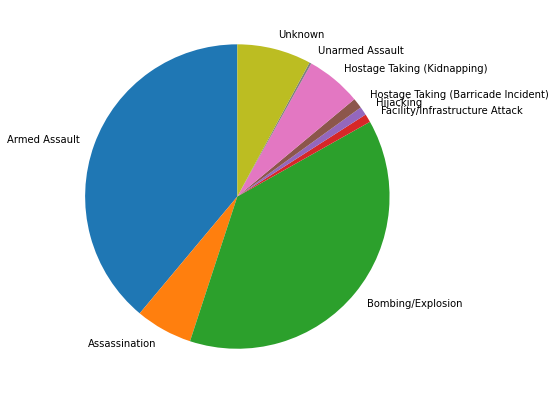

In [60]:
# No of persons killed with respect to attack type
type_to_num_killed = df.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
type_to_num_killed
plt.pie(type_to_num_killed[0:1], labels = type_to_num_killed.columns, startangle = 90)

In [73]:
# No of persons killed with respect to country
country_to_num_killed = df.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
country_to_num_killed
plt.bar(country_to_num_killed[0:1], labels = country_to_num_killed.columns,width=0.1)


TypeError: ignored

In [61]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 